<a href="https://colab.research.google.com/github/lalitha-sahitya/DigitAnalyzer/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/competitions/digit-recognizer')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 81.4MB/s]

Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [ ]:
os.listdir('digit-recognizer')

['test.csv', 'sample_submission.csv', 'train.csv']

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/digit-recognizer/train.csv')

In [ ]:
test_data=pd.read_csv('/content/digit-recognizer/test.csv')

In [ ]:
data.shape

(42000, 785)

In [ ]:
data_arr=[]
for i in range(data.shape[0]):
  data_arr.append(np.array(data.iloc[i,1:]).reshape(28,28))

In [ ]:
import matplotlib.pyplot as plt

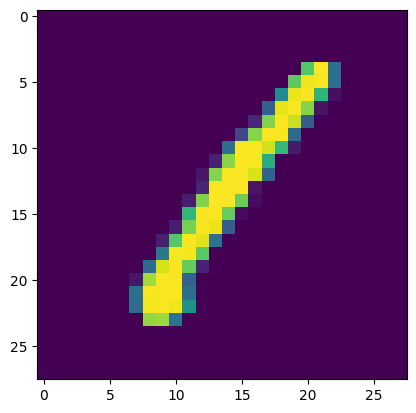

In [ ]:
plt.imshow(data_arr[0])

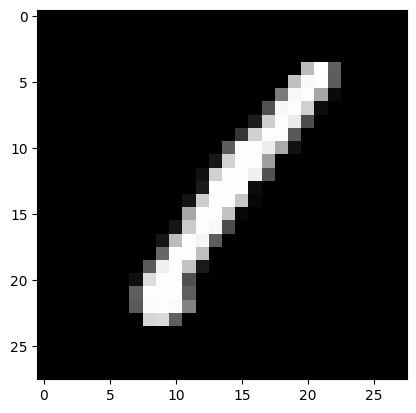

In [ ]:
plt.imshow(data_arr[0], cmap='gray')

In [ ]:
data.iloc[0][0]

<ipython-input-16-a5649ad43205>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.iloc[0][0]


1

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.iloc[0][1]

<ipython-input-18-af1b558ac0a9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.iloc[0][1]


0

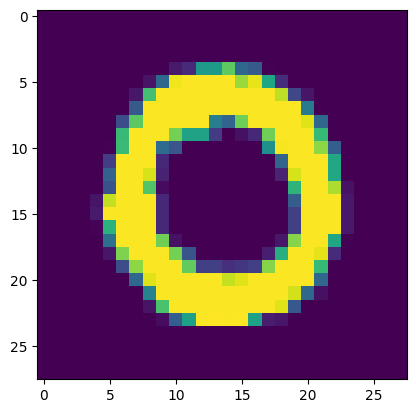

In [ ]:
plt.imshow(data_arr[1])

In [ ]:
test_arr=[]
for i in range(test_data.shape[0]):
  test_arr.append(np.array(test_data.iloc[i,:]).reshape(28,28))

In [ ]:
test_arr=np.array(test_arr)

In [ ]:
test_arr.shape

(28000, 28, 28)

In [ ]:
data_arr=np.array(data_arr)

In [ ]:
data_arr.shape

(42000, 28, 28)

In [ ]:
data_arr=data_arr/255.0
test_arr=test_arr/255.0

In [ ]:
data_arr = data_arr.reshape(-1, 28, 28, 1)
test_arr=test_arr.reshape(-1,28,28,1)

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(
    kernel_size=5,
    filters=8,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling(),
    input_shape=(28, 28, 1)
))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation='softmax',
                                kernel_initializer=tf.keras.initializers.VarianceScaling()))

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(data_arr, data.iloc[:, 0], epochs=20, validation_split=0.1, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8247 - loss: 0.5632 - val_accuracy: 0.9738 - val_loss: 0.0822
Epoch 2/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9726 - loss: 0.0928 - val_accuracy: 0.9838 - val_loss: 0.0566
Epoch 3/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9795 - loss: 0.0637 - val_accuracy: 0.9852 - val_loss: 0.0512
Epoch 4/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9833 - loss: 0.0499 - val_accuracy: 0.9876 - val_loss: 0.0447
Epoch 5/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9857 - val_loss: 0.0408
Epoch 6/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9862 - val_loss: 0.0411
Epoch 7/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9879 - val_loss: 0.0368
Epoch 8/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9917 -

In [ ]:
preds=model.predict(test_arr)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [ ]:
preds=np.argmax(preds,axis=1)

In [ ]:
preds[0]

2

In [ ]:
preds

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
sm=model.predict(data_arr)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [ ]:
m=np.argmax(sm,axis=1)

In [ ]:
m

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
data.iloc[:,0]

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(data.iloc[:,0],m)

0.9981904761904762

In [ ]:
sub=pd.read_csv('/content/digit-recognizer/sample_submission.csv')

In [ ]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
sub['Label']=preds

In [ ]:
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
sub.to_csv('sub.csv',index=False)

In [ ]:
data.iloc[:,0]

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [ ]:
model.save("digit_recognition_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def sol(img):
  img=cv2.imread(img)
  img=cv2.resize(img,(28,28))
  if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img=img/255.0
  img=img.reshape(-1,28,28,1)
  pred=model.predict(img)
  pred=np.argmax(pred)
  return pred

In [ ]:
sol('/content/0030-500x500.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


8

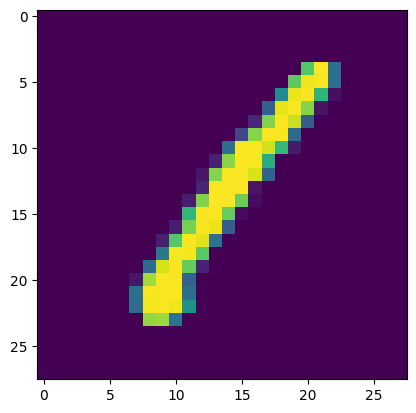

In [ ]:
plt.imshow(data_arr[0])

In [ ]:
sol('/content/images (1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


2

In [ ]:
data_arr[0].tofile('data_arr.bin')

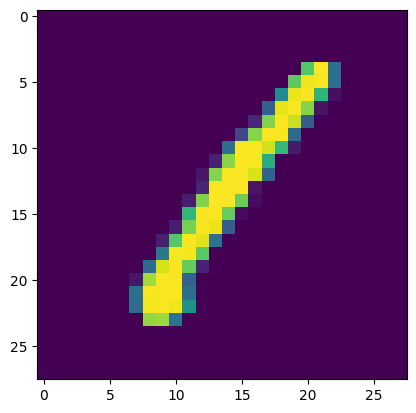

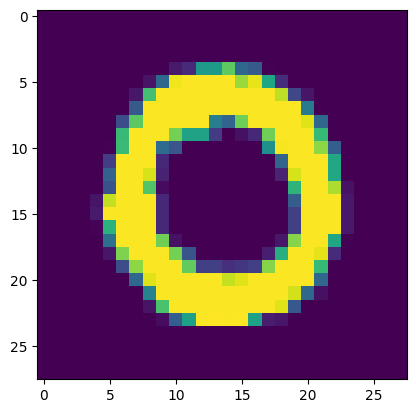

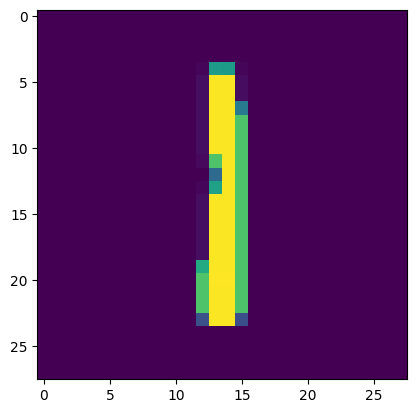

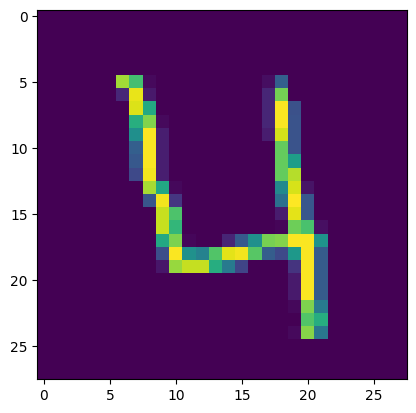

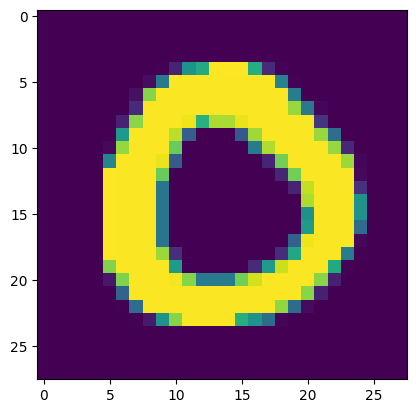

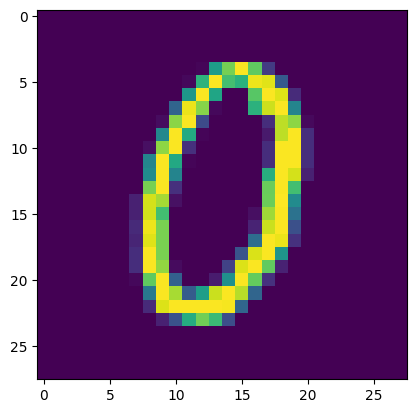

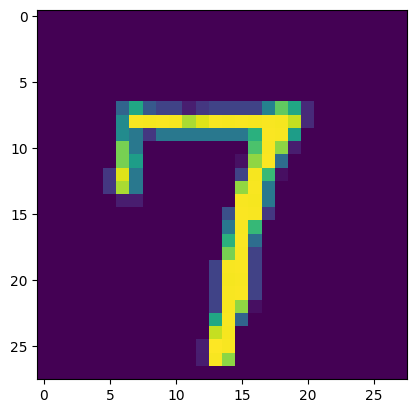

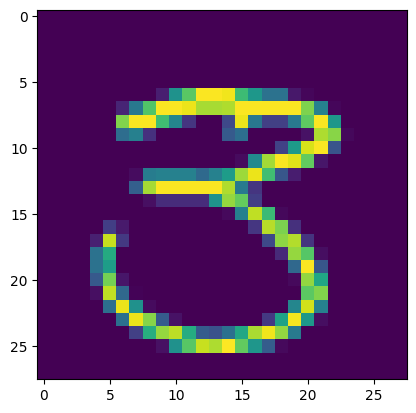

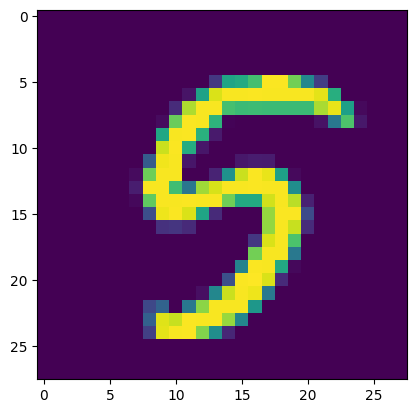

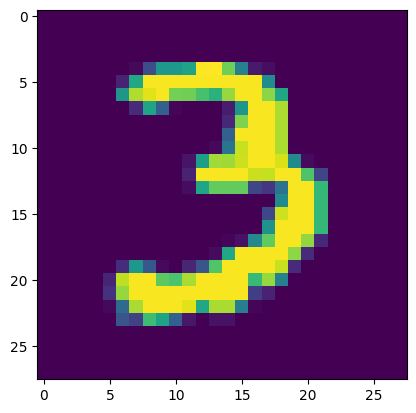

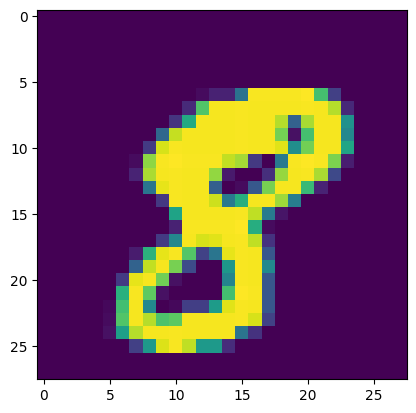

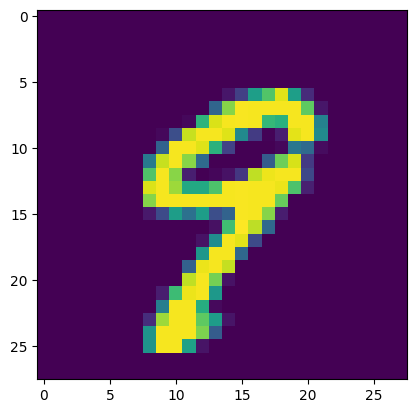

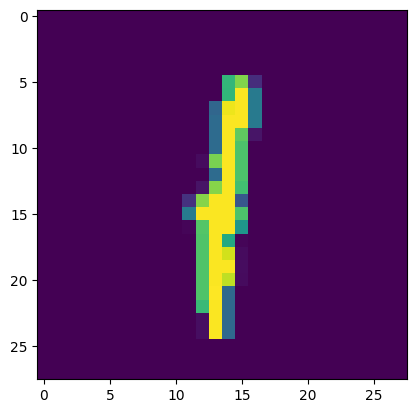

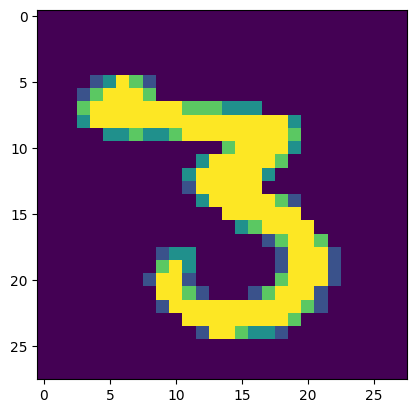

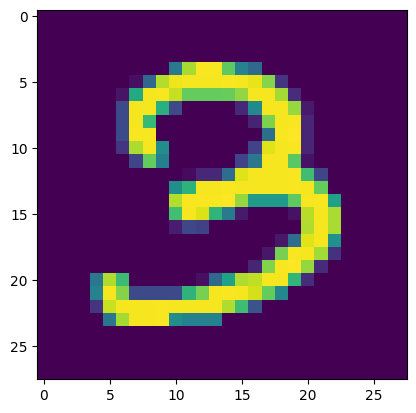

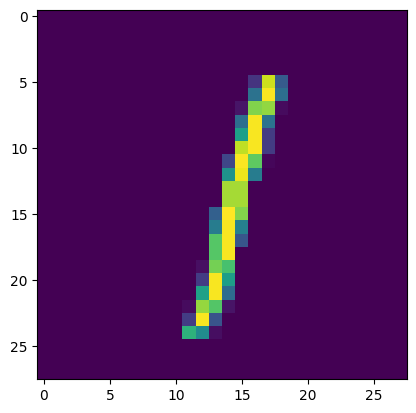

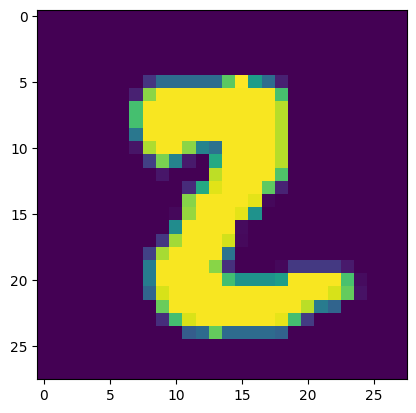

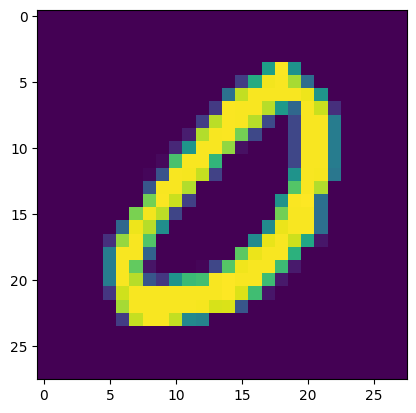

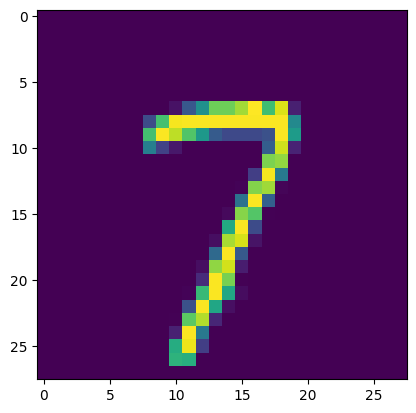

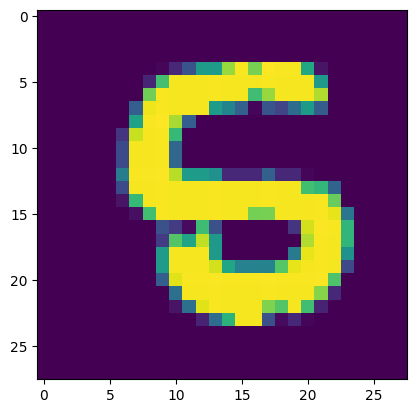

In [ ]:
for i in range(20):
  plt.imshow(data_arr[i])
  plt.show()

In [ ]:
m[:20]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
save_dir = "mnist_images"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
for i in range(30):
    plt.imshow(data_arr[i], cmap="gray")  # Display image in grayscale
    plt.axis("off")  # Remove axes
    filename = f"{save_dir}/digit_{m[i]}_{i}.png"  # Save with label and index
    plt.savefig(filename, bbox_inches="tight", pad_inches=0)
    plt.close()

In [ ]:
os.listdir('mnist_images')

['digit_3_9.png',
 'digit_3_13.png',
 'digit_1_0.png',
 'digit_7_29.png',
 'digit_0_23.png',
 'digit_9_11.png',
 'digit_4_3.png',
 'digit_2_16.png',
 'digit_6_21.png',
 'digit_7_6.png',
 'digit_0_5.png',
 'digit_9_27.png',
 'digit_2_22.png',
 'digit_8_20.png',
 'digit_2_24.png',
 'digit_3_7.png',
 'digit_5_8.png',
 'digit_7_18.png',
 'digit_1_2.png',
 'digit_3_25.png',
 'digit_1_15.png',
 'digit_0_4.png',
 'digit_1_12.png',
 'digit_6_26.png',
 'digit_0_1.png',
 'digit_0_17.png',
 'digit_5_19.png',
 'digit_8_10.png',
 'digit_9_28.png',
 'digit_3_14.png']

In [ ]:
from google.colab import files
for i in range(30):
  files.download(f'mnist_images/digit_{m[i]}_{i}.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(30,101):
    plt.imshow(data_arr[i], cmap="gray")  # Display image in grayscale
    plt.axis("off")  # Remove axes
    filename = f"{save_dir}/digit_{m[i]}_{i}.png"  # Save with label and index
    plt.savefig(filename, bbox_inches="tight", pad_inches=0)
    plt.close()

In [ ]:
for i in range(30,101):
  files.download(f'mnist_images/digit_{m[i]}_{i}.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
m[:100]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6,
       2, 0, 2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4, 9, 1, 4, 4,
       2, 6, 3, 7, 7, 4, 7, 5, 1, 9, 0, 2, 2, 3, 9, 1, 1, 1, 5, 0, 6, 3,
       4, 8, 1, 0, 3, 9, 6, 2, 6, 4, 7, 1, 4, 1, 5, 4, 8, 9, 2, 9, 9, 8,
       9, 6, 3, 6, 4, 6, 2, 9, 1, 2, 0, 5])

In [ ]:
m[93]

6

In [ ]:
filename = f"{save_dir}/digit_{m[93]}_{93}.png"  # Save with label and index
plt.savefig(filename, bbox_inches="tight", pad_inches=0)
plt.close()

In [ ]:
files.download(f'mnist_images/digit_{m[93]}_{93}.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filename = f"{save_dir}/digit_{m[91]}_{91}.png"  # Save with label and index
plt.savefig(filename, bbox_inches="tight", pad_inches=0)
plt.close()

In [ ]:
files.download(f'mnist_images/digit_{m[91]}_{91}.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

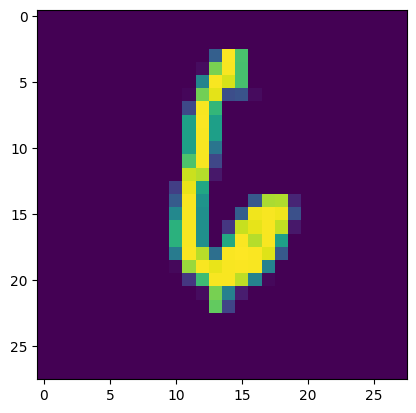

In [ ]:
plt.imshow(data_arr[93])

In [ ]:
m[93]

6